# Dataset

In [29]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt

In [30]:
# 2. Load and prepare data
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

In [31]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [35]:
X['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

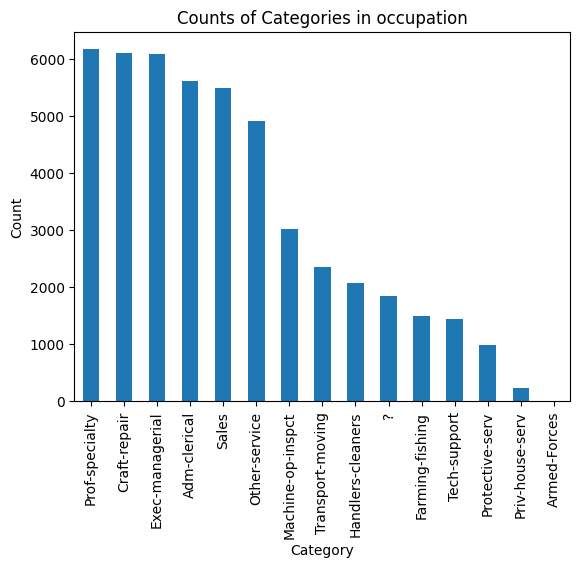

In [34]:
value_counts = X['occupation'].value_counts()

# Plot
value_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Counts of Categories in occupation')
plt.show()

In [36]:
X['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

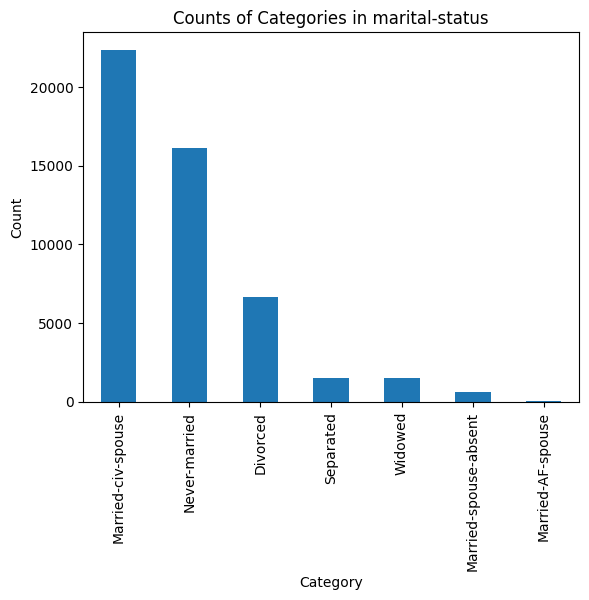

In [33]:
value_counts = X['marital-status'].value_counts()

# Plot
value_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Counts of Categories in marital-status')
plt.show()

In [ ]:
def report(X, y, dataset_name="Adult", task_type="Binary classification"):
    # Determine numerical and categorical columns
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

    # Pretty print
    print(f"Number of samples: {X.shape[0]}")
    print("\nNumerical Features:")
    for col in numerical_features:
        print(f"  - {col}")

    print("\nCategorical Features and Unique Categories:")
    num_unique_categories = 0
    for col in categorical_features:
        num_unique = X[col].nunique()
        print(f"  - {col} ({num_unique} unique categories)")
        num_unique_categories+=num_unique

    print(f"\nTotal num of unique categories: {num_unique_categories}")

In [ ]:
report(X, y)

Number of samples: 48842

Numerical Features:
  - age
  - fnlwgt
  - education-num
  - capital-gain
  - capital-loss
  - hours-per-week

Categorical Features and Unique Categories:
  - workclass (9 unique categories)
  - education (16 unique categories)
  - marital-status (7 unique categories)
  - occupation (15 unique categories)
  - relationship (6 unique categories)
  - race (5 unique categories)
  - sex (2 unique categories)
  - native-country (42 unique categories)

Total num of unique categories: 102


In [ ]:
print(X.isna().sum())
print(y.isna().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64
income    0
dtype: int64


In [ ]:
# Merge the features and targets into a single dataframe
df = pd.concat([X, y], axis=1)
# Replace '?' with NaN
df = df.replace('?', np.nan)

print(f"Before drop nan: {len(df)}")

# Drop rows with missing values
df = df.dropna()

print(f"After drop nan: {len(df)}")

# Replace '.' in income
df['income'] = df['income'].replace('<=50K.', '<=50K')
df['income'] = df['income'].replace('>50K.', '>50K')

# Rpelace Target values with binary
df['income'] = df['income'].replace({'>50K': 1, '<=50K': 0}) # >50k = 1, <=50k = 0

# Group all Countries except the top 3 into 'Other'
top_countries = df['native-country'].value_counts().index[:3]
df['native-country'] = df['native-country'].apply(lambda x: x if x in top_countries else 'Other')

# Proprecess Catgorical Columns to minimze risk of missmatch in matrices shape after synthesizing
# drop rows where worklass = without-pay
df = df[df['workclass'] != 'Without-pay']
# replace 5th-6th , 1st-4th and Preschool with 'Primary'
df['education'] = df['education'].replace('5th-6th', 'Primary')
df['education'] = df['education'].replace('1st-4th', 'Primary')
df['education'] = df['education'].replace('Preschool', 'Primary')
# drop rows where Marital status = Married-AF-spouse
df = df[df['marital-status'] != 'Married-AF-spouse']
# drop rows wehere occupation = Armed-Forces
df = df[df['occupation'] != 'Armed-Forces']

Before drop nan: 48842
After drop nan: 45222


C:\Users\leand\AppData\Local\Temp\ipykernel_33668\1088175984.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['income'] = df['income'].replace({'>50K': 1, '<=50K': 0}) # >50k = 1, <=50k = 0


In [ ]:
# Assuming your dataframe is called df
X = df.drop(columns=['income'])
y = df['income']

In [ ]:
report(X, y)

Number of samples: 45155

Numerical Features:
  - age
  - fnlwgt
  - education-num
  - capital-gain
  - capital-loss
  - hours-per-week

Categorical Features and Unique Categories:
  - workclass (6 unique categories)
  - education (14 unique categories)
  - marital-status (6 unique categories)
  - occupation (13 unique categories)
  - relationship (6 unique categories)
  - race (5 unique categories)
  - sex (2 unique categories)
  - native-country (4 unique categories)

Total num of unique categories: 56


---